In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/rselvanayagam/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.simplefilter('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
# https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html#stellar_param
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [7]:
Xtemp = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period','koi_time0bk','koi_slogg','koi_srad','koi_impact','koi_duration','koi_depth','koi_prad','koi_teq','koi_insol','koi_model_snr','koi_steff','koi_slogg','koi_srad','ra','dec','koi_kepmag']]
Xtemp

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_slogg,koi_srad,koi_impact,koi_duration,...,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,4.467,0.927,0.586,4.50700,...,2.83,443,9.11,25.8,5455,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,4.544,0.868,0.969,1.78220,...,14.60,638,39.30,76.3,5853,4.544,0.868,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,4.564,0.791,1.276,2.40641,...,33.46,1395,891.96,505.6,5805,4.564,0.791,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,4.438,1.046,0.701,1.65450,...,2.75,1406,926.16,40.9,6031,4.438,1.046,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,4.486,0.972,0.762,3.14020,...,2.77,1160,427.65,40.2,6046,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,132.016100,4.296,1.088,0.765,4.80600,...,1.11,929,176.40,8.4,5638,4.296,1.088,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,131.705093,4.529,0.903,1.252,3.22210,...,29.35,2088,4500.53,453.3,5638,4.529,0.903,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,133.001270,4.444,1.031,0.043,3.11400,...,0.72,1608,1585.81,10.6,6119,4.444,1.031,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,132.181750,4.447,1.041,0.147,0.86500,...,1.07,2218,5713.41,12.3,6173,4.447,1.041,294.16489,47.176281,15.385


In [8]:
data = df[['koi_disposition']]
data_binary_encoded = pd.get_dummies(data, columns=["koi_disposition"])
data_binary_encoded.columns = [["candidate","confirmed","false_positive"]]
y = data_binary_encoded
y

,candidate,confirmed,false_positive
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
6986,0,0,1
6987,0,0,1
6988,1,0,0
6989,0,0,1


In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(Xtemp, y)

In [10]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.12178749, 0.09713193, 0.12334678, 0.04518292, 0.04071193,
       0.02590656, 0.0171137 , 0.01738939, 0.03999669, 0.03092709,
       0.05033517, 0.08650906, 0.03579343, 0.03145336, 0.1203928 ,
       0.02099363, 0.01637584, 0.01813813, 0.02049618, 0.01943367,
       0.02058426])

In [11]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, Xtemp), reverse=True)

[(0.12334677763503492, 'koi_fpflag_co'),
 (0.12178748530320883, 'koi_fpflag_nt'),
 (0.12039280419331896, 'koi_model_snr'),
 (0.09713192614077362, 'koi_fpflag_ss'),
 (0.08650906400504936, 'koi_prad'),
 (0.050335170037067826, 'koi_depth'),
 (0.04518292149834225, 'koi_fpflag_ec'),
 (0.0407119305424771, 'koi_period'),
 (0.039996688656071214, 'koi_impact'),
 (0.03579342714205082, 'koi_teq'),
 (0.031453355253225145, 'koi_insol'),
 (0.03092709418087506, 'koi_duration'),
 (0.025906561853095804, 'koi_time0bk'),
 (0.02099363291722159, 'koi_steff'),
 (0.02058425626266225, 'koi_kepmag'),
 (0.020496181321954698, 'ra'),
 (0.019433674250334276, 'dec'),
 (0.018138125427133493, 'koi_srad'),
 (0.017389388800643595, 'koi_srad'),
 (0.017113697892214234, 'koi_slogg'),
 (0.016375836687244908, 'koi_slogg')]

In [12]:
X = Xtemp.drop(columns=['ra','dec','koi_kepmag','koi_srad','koi_slogg'])
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff
0,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,5455
1,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,5853
2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,5805
3,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,6031
4,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,6046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,132.016100,0.765,4.80600,87.7,1.11,929,176.40,8.4,5638
6987,0,1,1,0,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088,4500.53,453.3,5638
6988,0,0,0,0,1.739849,133.001270,0.043,3.11400,48.5,0.72,1608,1585.81,10.6,6119
6989,0,0,1,0,0.681402,132.181750,0.147,0.86500,103.6,1.07,2218,5713.41,12.3,6173


# Select your features (columns)

In [13]:
# Set features. This will also be used as your x values.
selected_features = X.columns
selected_features

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff'],
      dtype='object')

# Create a Train Test Split

Use `koi_disposition` for the y values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff
6122,0,0,0,0,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,5737
6370,0,1,0,1,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,5855
2879,1,0,0,0,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,6328
107,0,0,0,0,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,4768
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,5712


# Scale and Train the Model

In [16]:
# Create a StandardScater model and fit it to the training data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.775
k: 3, Train/Test Score: 0.890/0.797
k: 5, Train/Test Score: 0.871/0.801
k: 7, Train/Test Score: 0.861/0.807
k: 9, Train/Test Score: 0.853/0.807
k: 11, Train/Test Score: 0.852/0.814
k: 13, Train/Test Score: 0.850/0.809
k: 15, Train/Test Score: 0.848/0.808
k: 17, Train/Test Score: 0.844/0.812
k: 19, Train/Test Score: 0.841/0.805


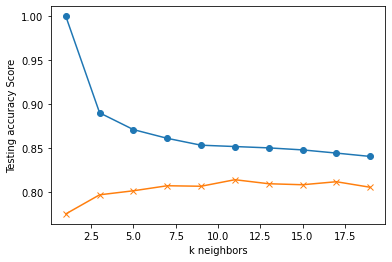

In [18]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

import matplotlib.pyplot as plt
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Accuracy: 0.814


#### Note: KNeighborsClassifier scored 81.4%